In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt 
sns.set_theme()

import matplotlib
matplotlib.rcParams.update({'font.size': 15})

In [2]:
data_categories = {'SNPs':"Genomics",
                   'CNV':"Genomics",
                   'CpGs (methylation)':"Epigenetics",
                   'SNV':"Genomics",
                   'mRNA (gene expression)': "Transcriptomics",
                   'miRNA':"Epigenetics",
                   'sc-transcriptomics': "Transcriptomics",
                   'sc-ATAC':"Epigenetics",
                   'proteome': "Proteomics",
                   'clinical': "Clinical",
                   'ncRNA':"Epigenetics",
                   'other': "other",
                   'WES':"Genomics",
                   'ChIP-seq':"Epigenetics",
                   'WGS':"Genomics",
                   'genotype':"Genomics",
                   "Copy number alterations":"Genomics",
                   "Fusions":"Genomics",
                   "Mutations":"Genomics"}

model_categories = {
    'VAE':"Autoencoder",
    'VNN (dense)':"Neural network",
    'AE':"Autoencoder",
    'VAE (conditional)':"Autoencoder",
    'Graph Convolutional Network (GCN)':"Graph network",
    'AE (convolutional)':"Autoencoder",
    'LSTM (convolutional)':"Neural network",
    'ensemble (MAE)':"other",
    'fuzzy network':"other",
    'Gaussian-Proces':"other",
    'PCA-like':"other",
    'ANN':"Neural network",
    'VNN (CNN)':"Neural network",
    'AE (vector quantized)':"Autoencoder",
    'AE (stacked)':"Autoencoder",
    'VAE (sparse)':"Autoencoder",
    'Convolutional Neural Network (CNN)':"Neural network",
    'Dense neural network':"Neural network",
    #'Transformer':"",
    'Capsule Network':"other",
    'Factor Graph Neural Network':"Graph network",
    'Self-organising maps (SOM)':"other",
    'AE (sparse)':"Autoencoder",
    'Graph Network':"Graph network"
}

In [3]:
outPath = "figures"

In [6]:
pd_table1 = pd.read_csv("data/Table_4.csv")

In [7]:
pd_Table_1_data_type = pd_table1.copy()
pd_Table_1_data_type = pd.concat([pd_Table_1_data_type, pd_Table_1_data_type['Data type'].str.split(', ', expand=True)], axis=1)
df_merged = pd.concat([pd_Table_1_data_type[0], pd_Table_1_data_type[1], pd_Table_1_data_type[2], pd_Table_1_data_type[3],pd_Table_1_data_type[4],pd_Table_1_data_type[5]], ignore_index=True)

df = pd.DataFrame(df_merged.value_counts())
df = df.loc[list(data_categories.keys()),]
df["cat"] = data_categories.values()

cat_list = []
labels_list = []
for cat in df["cat"].unique():
    cat_list.append(df[df["cat"] == cat][0].astype("int64").tolist())
    labels_list.append(df[df["cat"] == cat].index.tolist())

print(cat_list)
print(labels_list)

KeyError: 0

In [ ]:
basecol = 150

outer_colors = []
for i, cm in enumerate(["Blues", "Oranges", "Greens", "RdPu", "Reds", "Purples"]):
    cmap = plt.colormaps[cm]
    outer_colors.append(cmap(basecol))

    if i == 0:
        inner_colors = cmap(np.linspace(0.4,.9, num=len(cat_list[i])))
    else:
        inner_colors = np.append(inner_colors,  cmap(np.linspace(0.4,.9, num=len(cat_list[i]))), axis=0)

NameError: name 'outer_colors' is not defined

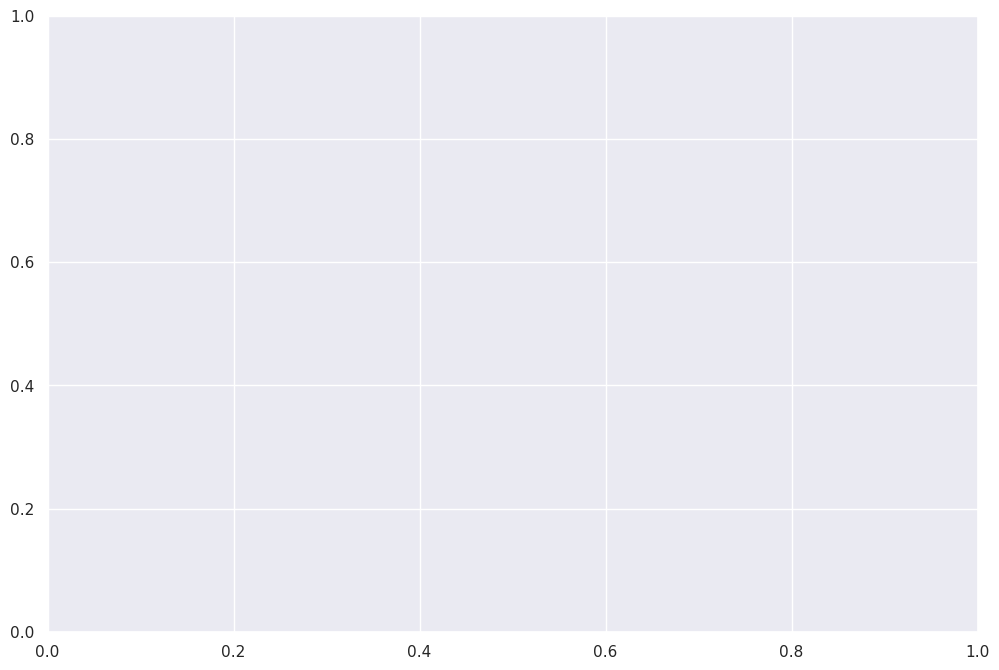

In [8]:
fig, ax = plt.subplots(figsize=(12,8))

size = 0.3
outervals = list(map(sum, cat_list))
innervals = [j for i in cat_list for j in i]
outer_labels = df["cat"].unique().tolist()
inner_labels = [j for i in labels_list for j in i]

cmap = plt.colormaps["tab20c"]
patches_outer, texts_outer, pct = ax.pie(outervals, radius=1, colors=outer_colors, labels=outer_labels, autopct='%1.0f%%', pctdistance=.85,
       wedgeprops=dict(width=size, edgecolor='w'))
patches_inner, texts_inner = ax.pie(innervals, radius=1-size, colors=inner_colors, #labels=inner_labels, 
       wedgeprops=dict(width=size, edgecolor='w'))

ax.legend(patches_inner, inner_labels, bbox_to_anchor=(1.03, 1.02))
fig.tight_layout()
fig.savefig(os.path.join(outPath, "datatypes_piePlot.png"), dpi=300)